# Laptop Price

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de los datos

In [259]:
path = "/Users/ceciliaguillametchargue/Downloads/laptop_price.csv"
data = pd.read_csv(path, sep = ',', engine = 'python')

### Análisis descriptivo de los datos

In [5]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [12]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [10]:
data.describe(include = "all")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [15]:
data.isnull().values.any()

False

No hay valores faltantes

### Depuración de la base

In [261]:
temp = data["ScreenResolution"].str.split(" ") #Dividimos
data["Resol"] = temp.str.get(-1) #tomamos lo último de cada fila
resol = data["Resol"].str.split('x', expand = True)
data["Resol_x"] = resol[0]
data["Resol_y"] = resol[1]
data["Resol_x"] = pd.to_numeric(data["Resol_x"])
data["Resol_y"] = pd.to_numeric(data["Resol_y"])

cpu_temp = data["Cpu"].str.split(" ")
data["Cpu model"] = cpu_temp.str.get(-1)
data["Processor"] = cpu_temp.str.get(0) + ' ' + cpu_temp.str.get(1) + ' ' + cpu_temp.str.get(2)

data["Cpu model"] = data["Cpu model"].replace('GHz','', regex = True) # Eliminamos el GB de la variable RAM
data["Cpu model"] = pd.to_numeric(data["Cpu model"]) # Convertimos a numérica
data.rename(columns = {'Cpu model': 'Cpu model (GHz)'}, inplace = True)

In [262]:
memory = data["Memory"].str.split(' ', 1, expand = True)
data["Memory"] = memory[0]
data["Memory type"] = memory[1]

In [263]:
data["Ram"] = data["Ram"].replace('GB','', regex = True) # Eliminamos el GB de la variable RAM
data["Ram"] = pd.to_numeric(data["Ram"]) # Convertimos a numérica
data.rename(columns = {'Ram': 'Ram (GB)'}, inplace = True)


data["Weight"] = data["Weight"].replace('kg','', regex = True) #Eliminamos el kg de la variable Weight
data["Weight"] = pd.to_numeric(data["Weight"]) # Convertimos a numérica
data.rename(columns = {'Weight': 'Weight (kg)'}, inplace = True)

In [264]:
gpu_temp = data["Gpu"].str.split(' ')
gpu_temp2 = list(gpu_temp)

gpu_temp3 = []
for i in gpu_temp2:
    gpu_temp3.append(' '.join(i[1:]))

data['Gpu brand'] = gpu_temp.str.get(0)
data['Gpu model'] = gpu_temp3

In [265]:
data["Memory"] = data["Memory"].replace('GB', '',regex = True)
data["Memory"] = data["Memory"].replace('TB', '',regex = True)

data["Memory"] = pd.to_numeric(data["Memory"])

data["Memory"] = data["Memory"].apply(lambda x: 1024 if x==1 else x)
data["Memory"] = data["Memory"].apply(lambda x: 2048 if x==2 else x)
data.rename(columns={"Memory":"Memory (GB)"}, inplace=True)

In [266]:
data.describe()

,laptop_ID,Inches,Ram (GB),Memory (GB),Weight (kg),Price_euros,Resol_x,Resol_y,Cpu model (GHz)
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,447.809670,2.038734,1123.686992,1894.784344,1070.830391,2.298772
std,381.172104,1.426304,5.084665,366.037159,0.665475,699.009043,494.641028,284.519410,0.506340
min,1.000000,10.100000,2.000000,8.000000,0.690000,174.000000,1366.000000,768.000000,0.900000
25%,331.500000,14.000000,4.000000,256.000000,1.500000,599.000000,1600.000000,900.000000,2.000000
50%,659.000000,15.600000,8.000000,256.000000,2.040000,977.000000,1920.000000,1080.000000,2.500000
75%,990.500000,15.600000,8.000000,512.000000,2.300000,1487.880000,1920.000000,1080.000000,2.700000
max,1320.000000,18.400000,64.000000,2048.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000


In [267]:
data.set_index('laptop_ID', inplace = True)
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory (GB),Gpu,OpSys,Weight (kg),Price_euros,Resol,Resol_x,Resol_y,Cpu model (GHz),Processor,Memory type,Gpu brand,Gpu model
laptop_ID,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,2560,1600,2.3,Intel Core i5,SSD,Intel,Iris Plus Graphics 640
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,1440,900,1.8,Intel Core i5,Flash Storage,Intel,HD Graphics 6000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,1920,1080,2.5,Intel Core i5,SSD,Intel,HD Graphics 620
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,2880,1800,2.7,Intel Core i7,SSD,AMD,Radeon Pro 455
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,2560,1600,3.1,Intel Core i5,SSD,Intel,Iris Plus Graphics 650


### Visualizations

Text(0.5, 1.0, 'Precios en función de marcas')

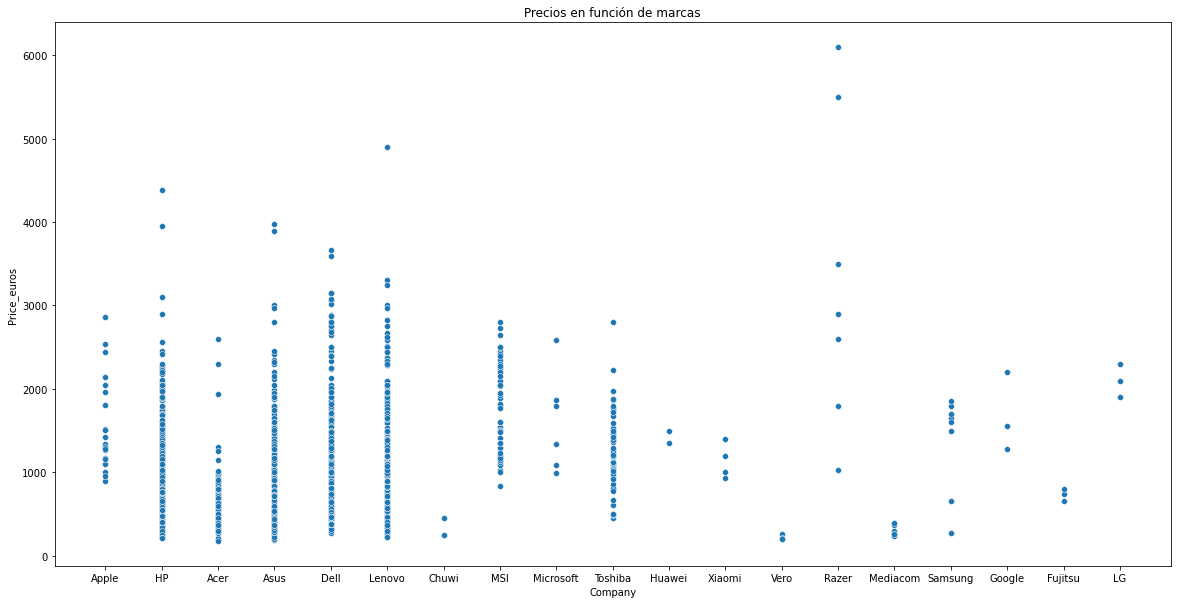

In [288]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Company", y = "Price_euros")
plt.title("Precios en función de marcas")

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

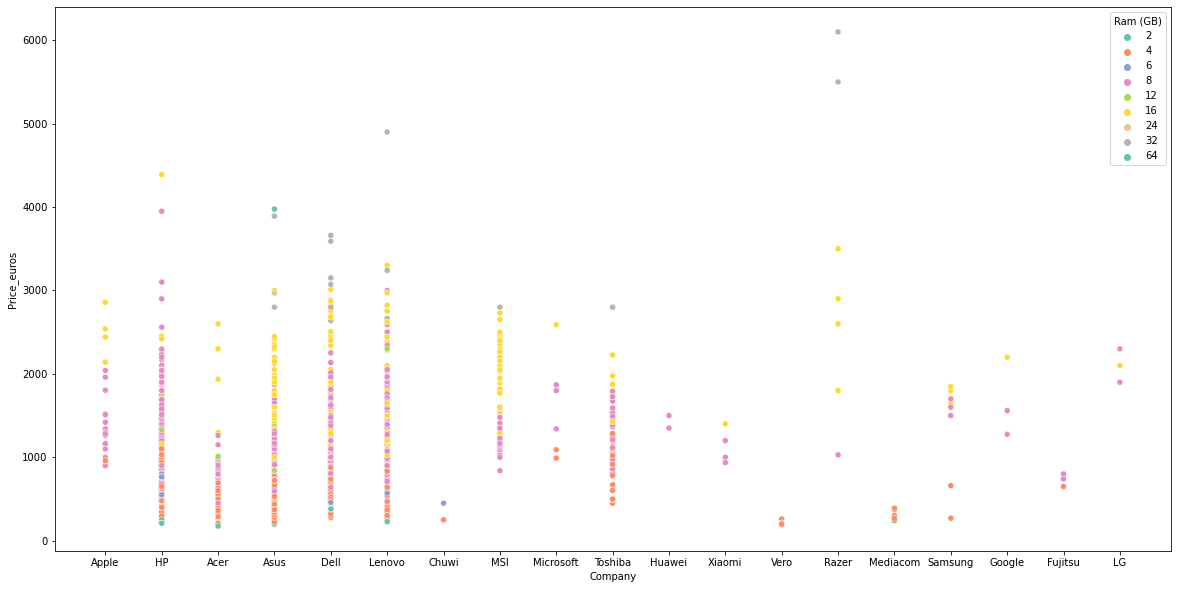

In [300]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Company", y = "Price_euros", hue = "Ram (GB)", palette = "Set2")

<AxesSubplot:xlabel='Price_euros', ylabel='Processor'>

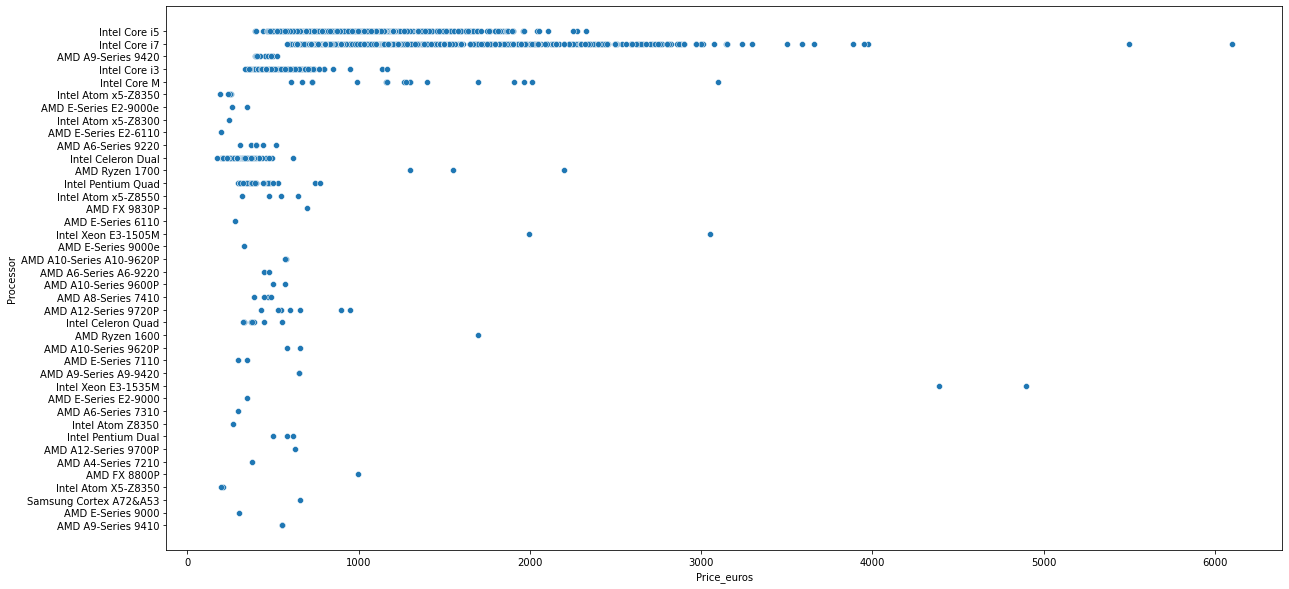

In [302]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Price_euros", y = "Processor")

<AxesSubplot:>

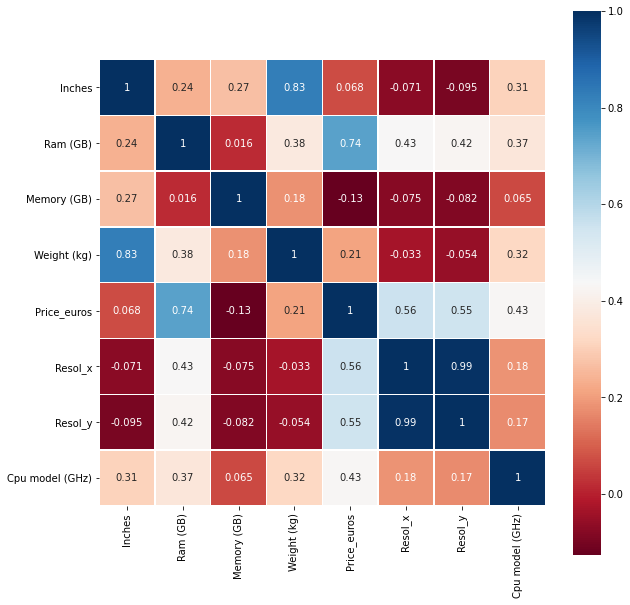

In [283]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), square=True , annot= True, linewidths=.5, annot_kws ={"size" : 10}, cmap ='RdBu')